In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

 Nesse notebook iremos trabalhar com banco de dados fictício de um site de venda de carros, com as seguites informações :
  - quantidade de milhas rodadas por ano 
  - ano de cada modelo
  - preço de cada carro
  - se o carro foi vendido ou não
  
  
 Objetivo: Levando em consideração as características do carro, como ano de fabricação, quantidade de quilometros rodados e preço de venda, iremos testar o DecisionTreeClassfiere avaliar como esse modelo se sai.

In [3]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(url, sep =',')

In [4]:
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


 - Renomenado ass colunas

In [5]:
new_colunas = {
    'mileage_per_year':'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'sold' : 'vendido',
    'price': 'preco'
}

dados = dados.rename(columns = new_colunas)

 - Substituindo os valores da coluna vendido por variáveis numéricas.

In [6]:
vendido = {
    'no':0,
    'yes':1
}

dados['vendido']= dados.vendido.map(vendido)

 - Criando 2 novas colunas - Idade_do_modelo e Km_por_ano .

In [7]:
ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo

In [8]:
# convertendo milhas para km

dados['km_por_ano'] = dados.milhas_por_ano * 1.60934

In [9]:
dados = dados.drop(columns = ['Unnamed: 0','milhas_por_ano','ano_do_modelo'] , axis = 1)

 - Reordenando as colunas .

In [10]:
lista_cols = ['idade_do_modelo', 'km_por_ano','preco', 'vendido']
dados = dados[lista_cols]

In [11]:
dados.head()

,idade_do_modelo,km_por_ano,preco,vendido
0,21,35085.22134,30941.02,1
1,23,12622.05362,40557.96,1
2,15,11440.79806,89627.50,0
3,6,43167.32682,95276.14,0
4,7,12770.11290,117384.68,1


- Gerando algumas vizualizaçoes .

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B0F94193D0>,
      dtype=object)

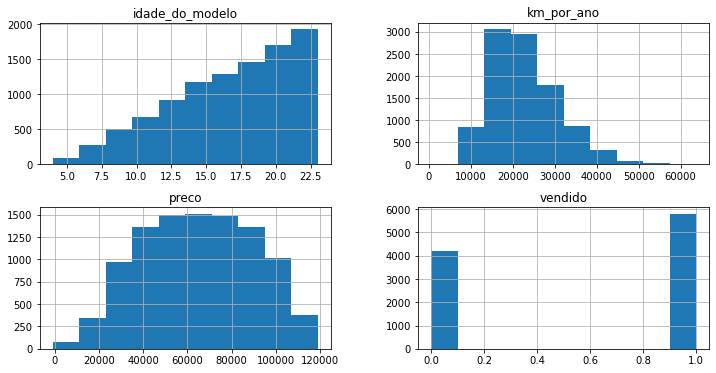

In [14]:
plt.figure
dados.hist(figsize = (12,6))

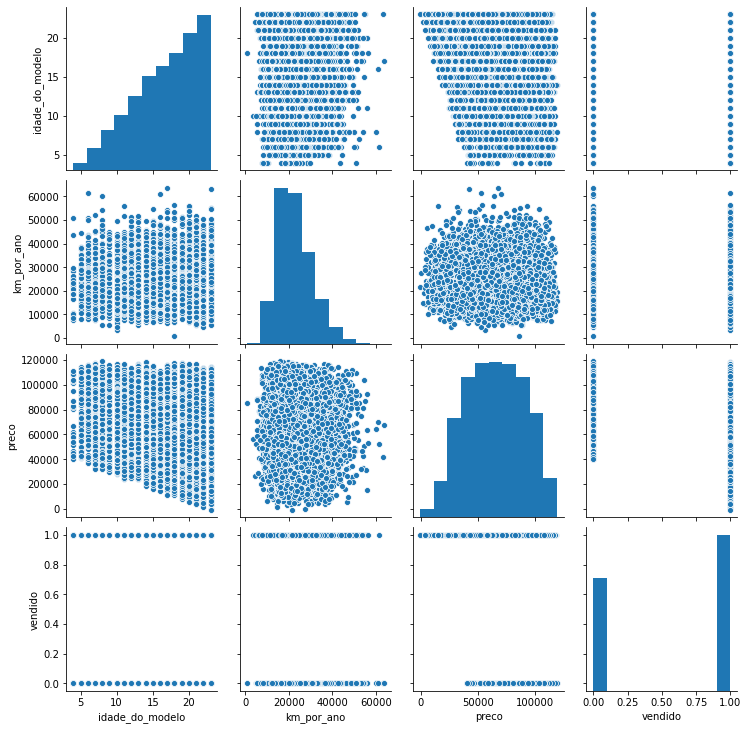

In [26]:
sns.pairplot(dados)

In [27]:
dados.corr()

,idade_do_modelo,km_por_ano,preco,vendido
idade_do_modelo,1.000000,0.016486,-0.207001,0.071855
km_por_ano,0.016486,1.000000,-0.020552,-0.137252
preco,-0.207001,-0.020552,1.000000,-0.437865
vendido,0.071855,-0.137252,-0.437865,1.000000


### Machine learning

 - Separando os dados em x e y

In [28]:
x = dados.drop('vendido', axis = 1)
y = dados['vendido']

 - Separando as amostras de treino e teste e aplicando o algoritmo de machine learning DummyClassifier, como uma baseline.

In [33]:
from sklearn.model_selection import train_test_split

SEED = 5
np.random.seed(SEED)
x_treino, x_teste , y_treino, y_teste = train_test_split(x, y, test_size = 0.25, stratify = y)

In [34]:
# pegando DummyClassifier como baseline 
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy="stratified")
dummy_stratified.fit(x_treino, y_treino)
acuracia = dummy_stratified.score(x_teste, y_teste) * 100

print('A acurácia do dummy stratified foi %.2f%%' % acuracia)

A acurácia do dummy stratified foi 51.00%


In [35]:
from sklearn.dummy import DummyClassifier

dummy_most_frequent = DummyClassifier(strategy="most_frequent")
dummy_most_frequent.fit(x_treino, y_treino)
acuracia = dummy_most_frequent.score(x_teste, y_teste) * 100

print('A acurácia do dummy most frequent foi %.2f%%' % acuracia)

A acurácia do dummy most frequent foi 58.00%


## DecisionTreeClassifier

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree


SEED = 5
np.random.seed(SEED)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(x_treino), len(x_teste)))

modelo = DecisionTreeClassifier(max_depth = 2)
modelo.fit(x_treino, y_treino)
y_pred = modelo.predict(x_teste)
acuracia = accuracy_score(y_teste, y_pred) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 76.84%


 - Plotando a árvore de decisão.

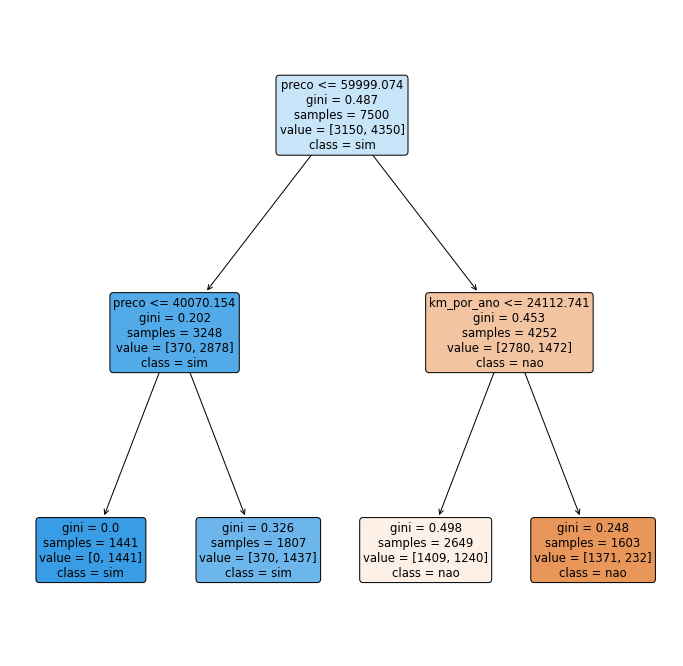

In [37]:
plt.figure(figsize=(12,12))
features = x.columns
plot_tree(modelo,filled=True, rounded=True, feature_names=features, class_names = ['nao','sim']);